In [ ]:
# I want to fact-check the February 2021 visualization from the Heritage foundation, 
# on their website with almost no commentary,
# https://datavisualizations.heritage.org/public-health/one-percent-of-us-counties-account-for-bulk-of-covid-19-deaths/
# "Through January 31, there have been 433,401 deaths in the U.S. from COVID-19, but a significant 
#  proportion of those have occurred in just a handful of counties. In fact, the 30 counties with 
#  the most deaths represent 1 percent of all counties, 21 percent of the total U.S. population, 
#  and 28 percent of all U.S. deaths."



In [ ]:
# The CDC has an API to serve county-level cases and deaths data:
# https://data.cdc.gov/NCHS/Provisional-COVID-19-Deaths-by-County-and-Race-and/k8wy-p9cg

# Initial tests suggest, though, that the data does not reach back to January 2021.


In [ ]:
# There is a huge, updated database on the NY Times github page:
# https://github.com/nytimes/covid-19-data 
# That contains a 75-Mb file us-counties.csv.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
counties = pd.read_csv("us-counties.csv")

In [3]:
counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [4]:
cookco = counties.loc[np.where( counties.fips == 17031)]

In [5]:
len(cookco)

648

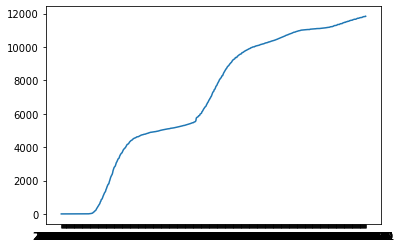

In [6]:
plt.plot(cookco.date, cookco.deaths)

In [ ]:
# That took a long time and seems like it was plotting nominal time data.   
# Search engine, "pandas to date format," please?
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# Thanks.

In [7]:
d = pd.to_datetime(counties["date"])


In [10]:
d


0         2020-01-21
1         2020-01-22
2         2020-01-23
3         2020-01-24
4         2020-01-24
             ...    
1875093   2021-11-01
1875094   2021-11-01
1875095   2021-11-01
1875096   2021-11-01
1875097   2021-11-01
Name: date, Length: 1875098, dtype: datetime64[ns]

In [8]:
counties["date"] = d

In [9]:
cookco = counties.loc[np.where( counties.fips == 17031)]

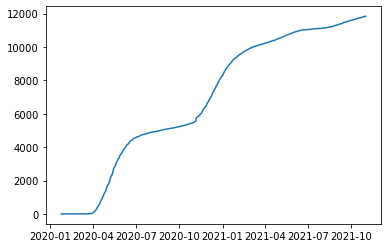

In [13]:
plt.plot(cookco.date, cookco.deaths)

In [ ]:
# Now everyone stare at this for a minute.  What is this the graph of ?

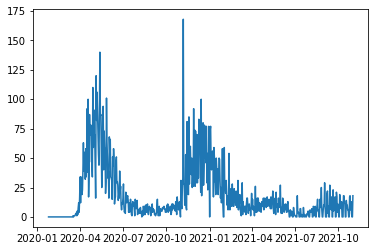

In [14]:
plt.plot(cookco.date[1:], np.diff(cookco.deaths))

In [1]:
febdata = counties.loc[np.where(counties.date =="2021-01-31")]

NameError: name 'counties' is not defined

In [18]:
len(febdata)

3247

In [19]:
febdata.head()

,date,county,state,fips,cases,deaths
982097,2021-01-31,Autauga,Alabama,1001.0,5669,69.0
982098,2021-01-31,Baldwin,Alabama,1003.0,18126,224.0
982099,2021-01-31,Barbour,Alabama,1005.0,1951,40.0
982100,2021-01-31,Bibb,Alabama,1007.0,2307,52.0
982101,2021-01-31,Blount,Alabama,1009.0,5713,100.0


In [20]:
febdata.deaths.sum()

441299.0

In [ ]:
# This is more than 433,401 deaths quoted on the Heratige site, but 
# we are clearly in the right ballpark here; the 8000 deaths might be 
# differences in the territorial scope of their query or the data may
# have been revised upward by 1.7%.  Onward!

(array([2.879e+03, 1.410e+02, 6.300e+01, 1.700e+01, 1.900e+01, 1.000e+01,
        1.100e+01, 9.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

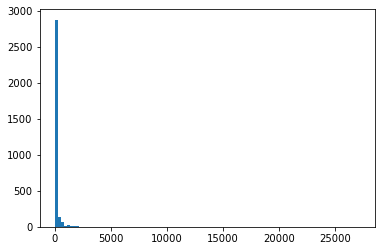

In [21]:
plt.hist(febdata.deaths, bins=100)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 4.433577838129562] is not finite

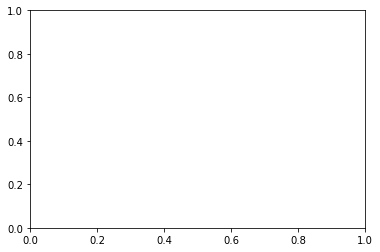

In [22]:
# Ack.  That's not very expressive, is it?
# In vanilla matplotlib, you have to draw your own bins if you want a nice log-histogram.

# https://stackoverflow.com/questions/47850202/plotting-a-histogram-on-a-log-scale-with-matplotlib
    
plt.hist(np.log(febdata.deaths) / np.log(10), bins=100)


(array([ 87.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  57.,   0.,   0.,   0.,
         59.,   0.,  62.,   0.,  68.,  50.,  51.,  53.,  55., 110.,  98.,
         85., 118., 120., 154., 136., 184., 167., 171., 142., 134., 160.,
        115.,  96.,  85.,  73.,  75.,  48.,  64.,  43.,  49.,  24.,  23.,
         26.,  30.,  16.,  11.,  13.,  11.,  10.,  11.,   7.,   7.,   4.,
          1.,   2.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([-3.        , -2.92566422, -2.85132844, -2.77699266, -2.70265689,
        -2.62832111, -2.55398533, -2.47964955, -2.40531377, -2.33097799,
        -2.25664221, -2.18230644, -2.10797066, -2.03363488, -1.9592991 ,
        -1.88496332, -1.81062754, -1.73629176, -1.66195599, -1.58762021,
        -1.51328443, -1.43

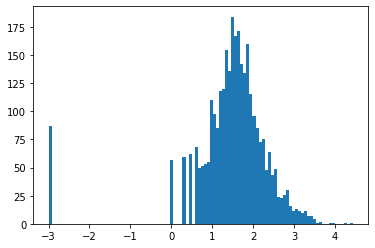

In [23]:
plt.hist(np.log(febdata.deaths + .001) / np.log(10), bins=100)


In [26]:
bins = np.exp(np.arange(-1,4,.05))

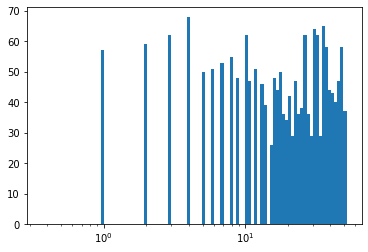

In [27]:
plt.hist(febdata.deaths , bins=bins )
plt.xscale("log")

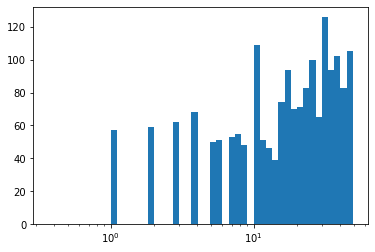

In [28]:
bins = np.exp(np.arange(-1,4,.1))
plt.hist(febdata.deaths , bins=bins )
plt.xscale("log")

In [ ]:
# That's not right.  Am I using arange wrong?

In [29]:
bins

array([ 0.36787944,  0.40656966,  0.44932896,  0.4965853 ,  0.54881164,
        0.60653066,  0.67032005,  0.74081822,  0.81873075,  0.90483742,
        1.        ,  1.10517092,  1.22140276,  1.34985881,  1.4918247 ,
        1.64872127,  1.8221188 ,  2.01375271,  2.22554093,  2.45960311,
        2.71828183,  3.00416602,  3.32011692,  3.66929667,  4.05519997,
        4.48168907,  4.95303242,  5.47394739,  6.04964746,  6.68589444,
        7.3890561 ,  8.16616991,  9.0250135 ,  9.97418245, 11.02317638,
       12.18249396, 13.46373804, 14.87973172, 16.44464677, 18.17414537,
       20.08553692, 22.19795128, 24.5325302 , 27.11263892, 29.96410005,
       33.11545196, 36.59823444, 40.44730436, 44.70118449, 49.40244911])

In [ ]:
# That's not the right range... Oh.  The 

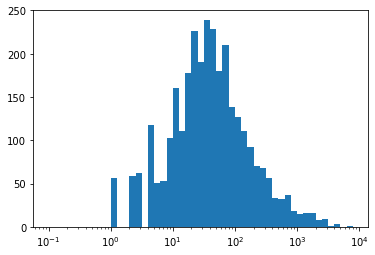

In [33]:
bins = np.power(10, np.arange(-1,4,.1) )
plt.hist(febdata.deaths , bins=bins )
plt.xscale("log")

In [ ]:
# And it looks like now we're silently ignoring the counties with no deaths.

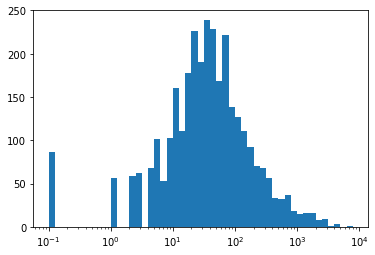

In [35]:
bins = np.power(10, np.arange(-1,4,.1) )
plt.hist(febdata.deaths+.1 , bins=bins )
plt.xscale("log")

In [36]:
# This log-histogram really robs me of any sense of what the distribution is actually like.
# Can we plot a cumulative plot?
deathsbycounty = febdata.deaths.sort_values()

Text(0, 0.5, 'Per-county cumulative COVID deaths, Feb 2021')

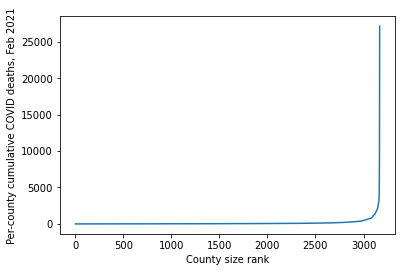

In [39]:
plt.plot(np.arange(len(deathsbycounty)), deathsbycounty)
plt.xlabel("County size rank")
plt.ylabel("Per-county cumulative COVID deaths, Feb 2021")

In [40]:
# Rrr.  This still does not make me think I understand.  The legend says "cumulative"
# meaning cumulative by time.  Let's try cumulative by county. 

Text(0, 0.5, 'Per-county cumulative COVID deaths, Feb 2021')

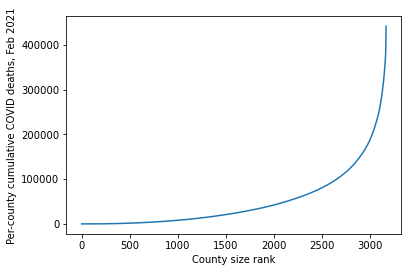

In [41]:
plt.plot(np.arange(len(deathsbycounty-1)), np.cumsum(deathsbycounty))
plt.xlabel("County size rank")
plt.ylabel("Per-county cumulative COVID deaths, Feb 2021")

In [ ]:
# This is getting closer.  Clearly more than half of deaths are in a 
# small fracton of the counties.  

In [42]:
# top 30 counties, fraction of deaths?
deathsbycounty.head()

982482    0.0
982328    0.0
983196    0.0
984318    0.0
984351    0.0
Name: deaths, dtype: float64

In [44]:
deathsbycounty[-30:]

984475   NaN
984476   NaN
984477   NaN
984478   NaN
984479   NaN
984480   NaN
984481   NaN
984482   NaN
984483   NaN
984484   NaN
984485   NaN
984486   NaN
984487   NaN
984488   NaN
984489   NaN
984490   NaN
984491   NaN
984492   NaN
984493   NaN
984494   NaN
984495   NaN
984496   NaN
984497   NaN
984499   NaN
984500   NaN
984501   NaN
984502   NaN
984503   NaN
984504   NaN
984505   NaN
Name: deaths, dtype: float64

In [50]:
deathsbycounty.loc[np.isnan(deathsbycounty)] = 0

In [53]:
deathsbycounty=deathsbycounty.sort_values()

In [54]:
deathsbycounty[-30:]

983402     1898.0
983999     1906.0
983899     1923.0
982405     1932.0
983329     1969.0
982424     2092.0
982406     2107.0
984789     2116.0
984939     2160.0
982468     2166.0
984734     2348.0
984827     2427.0
983889     2474.0
983894     2539.0
982319     2619.0
983971     2677.0
983991     2794.0
984776     2819.0
984410     2908.0
982312     3062.0
982315     3091.0
983333     3126.0
983862     3276.0
983422     3984.0
984820     4257.0
982461     4874.0
982199     7462.0
982712     9374.0
982301    16770.0
983972    27138.0
Name: deaths, dtype: float64

In [55]:
np.sum(deathsbycounty[-30:]) / np.sum(deathsbycounty)

0.2952374693801708

In [56]:
np.sum(deathsbycounty[-30:])

130288.0

In [57]:
# Now we need to go fetch population by county (2010 census I suppose)
# # This table purports to assemble 2020? census data in a usable table
# https://github.com/nytimes/covid-19-data/issues/180
population = pd.read_json("https://raw.githubusercontent.com/Zoooook/CoronavirusTimelapse/master/static/population.json")

In [58]:
population.head()

,us_state_fips,us_county_fips,population,region,subregion,nyt_population
0,78,78999,104680,Virgin Islands,Unknown,NaN
1,72,72999,3386941,Puerto Rico,Unknown,NaN
2,66,66999,165768,Guam,Unknown,NaN
3,69,69999,56882,Northern Mariana Islands,Unknown,NaN
4,1,1001,55200,Alabama,Autauga,NaN


In [59]:
population["fips"] = population["us_county_fips"]

In [88]:
countiesbypop = population.population.sort_values(ascending=False)

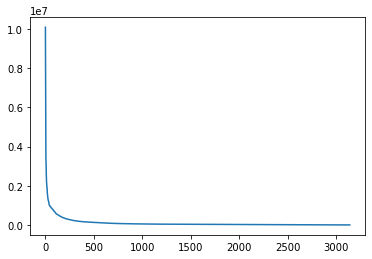

In [90]:
plt.plot(np.arange(len(countiesbypop)), countiesbypop)

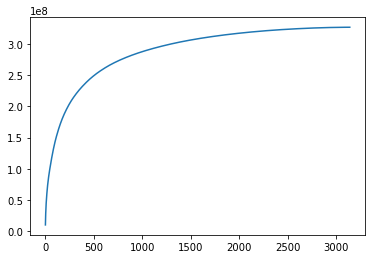

In [92]:
plt.plot(np.arange(len(countiesbypop)), np.cumsum(countiesbypop))

In [ ]:
plt.plot(np.arange(len(countiesbypop)), np.cumsum(countiesbypop))
plt.plot(np.arange(len(countiesbypop)), np.cumsum(countiesbypop))

In [93]:
deathsbycountyrev = febdata.deaths.sort_values(ascending=False)

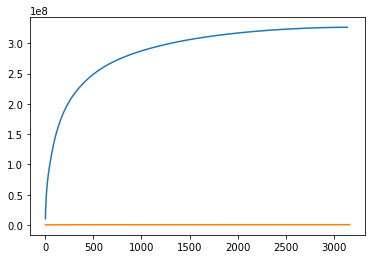

In [94]:
plt.plot(np.arange(len(countiesbypop)), np.cumsum(countiesbypop))
plt.plot(np.arange(len(deathsbycountyrev)), np.cumsum(deathsbycountyrev))

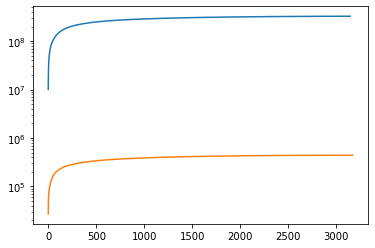

In [95]:
plt.plot(np.arange(len(countiesbypop)), np.cumsum(countiesbypop))
plt.plot(np.arange(len(deathsbycountyrev)), np.cumsum(deathsbycountyrev))
plt.yscale("log")

In [87]:
population.sort_values?

Signature:
population.sort_values(
    by,
    axis=0,
    ascending=True,
    inplace=False,
    kind='quicksort',
    na_position='last',
    ignore_index=False,
    key: Union[Callable[[ForwardRef('Series')], Union[ForwardRef('Series'), ~AnyArrayLike]], NoneType] = None,
)
Docstring:
Sort by the values along either axis.

Parameters
----------
        by : str or list of str
            Name or list of names to sort by.

            - if `axis` is 0 or `'index'` then `by` may contain index
              levels and/or column labels.
            - if `axis` is 1 or `'columns'` then `by` may contain column
              levels and/or index labels.

            .. versionchanged:: 0.23.0

               Allow specifying index or column level names.
axis : {0 or 'index', 1 or 'columns'}, default 0
     Axis to be sorted.
ascending : bool or list of bool, default True
     Sort ascending vs. descending. Specify list for multiple sort
     orders.  If this is a list of bools, must match th

In [60]:
intfips = int(counties["fips"])

TypeError: cannot convert the series to <class 'int'>

In [61]:
intfips = np.int(counties["fips"])

TypeError: cannot convert the series to <class 'int'>

In [62]:
intfips = pd.int(counties["fips"])

AttributeError: module 'pandas' has no attribute 'int'

In [63]:
intfips = counties.fips.astype("int")

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [64]:
counties.fips == "NA"

0          False
1          False
2          False
3          False
4          False
           ...  
1875093    False
1875094    False
1875095    False
1875096    False
1875097    False
Name: fips, Length: 1875098, dtype: bool

In [68]:
np.isinf(counties.fips)

0          False
1          False
2          False
3          False
4          False
           ...  
1875093    False
1875094    False
1875095    False
1875096    False
1875097    False
Name: fips, Length: 1875098, dtype: bool

In [69]:
np.isinf(counties.fips).sum()

0

In [70]:
intfips = counties.fips.astype("int", errors="ignore"  )

In [73]:
intfips.dtype


dtype('float64')

In [72]:
population.fips.dtype

dtype('int64')

In [74]:
intfips

0          53061.0
1          53061.0
2          53061.0
3          17031.0
4          53061.0
            ...   
1875093    56037.0
1875094    56039.0
1875095    56041.0
1875096    56043.0
1875097    56045.0
Name: fips, Length: 1875098, dtype: float64

In [75]:
intfips = counties.fips.astype("int64", errors="ignore"  )

In [76]:
intfips

0          53061.0
1          53061.0
2          53061.0
3          17031.0
4          53061.0
            ...   
1875093    56037.0
1875094    56039.0
1875095    56041.0
1875096    56043.0
1875097    56045.0
Name: fips, Length: 1875098, dtype: float64

In [78]:
intfips = counties.fips.astype(np.int64, errors="ignore"  )

In [79]:
intfips.head()

0    53061.0
1    53061.0
2    53061.0
3    17031.0
4    53061.0
Name: fips, dtype: float64

In [80]:
intfips = counties.fips.astype(np.int64 )

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
for fips in counties.fips:
    try:
        a = fips.astype(np.int64)
    except:
        print(fips)
# UGH OH

In [83]:
np.isnan(counties.fips).sum()

17137